## Lib import

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')   

## Declare functions

In [22]:
#definition of detection function
def MSE_anomaly_detection(data):
    
    clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
    clf.fit(data['MSE'].values.reshape(-1,1))
    pred = clf.predict(data['MSE'].values.reshape(-1,1))
    data['anomaly']=pred
    rolling_mean = data.MSE.rolling(window=400).mean()
    rolling_mean = rolling_mean.fillna(method='bfill')
    for i in range(len(data.MSE)):
        if data.MSE[i] < rolling_mean[i]:
            data.anomaly[i] = 1
    outliers=data.loc[data['anomaly']==-1]
    outlier_index=list(outliers.index)
    # Найти количество найденных аномалий
    return data

def plot_anomaly(data):
    plt.style.use('seaborn')
    fig,ax = plt.subplots(1,1,figsize=(10,15))
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=15) 
    anomaly = data['anomaly'].values
    MSE_surf = data['MSE'].values
    depth = data['MD'].values
    plt.xlabel('MSE', fontsize=20)
    plt.ylabel('Глубина м', fontsize=15)
    plt.tick_params(axis='both',labelsize=15)
    for i in range(len(anomaly)):
        if anomaly[i] == -1:
            plt.plot(MSE_surf[i],depth[i],marker='o',color='red')
    plt.plot(MSE_surf, depth)
    plt.grid(True)
    plt.legend()
    ax.invert_yaxis()
    fig.savefig('anomalies', dpi=300)
    
def plot_anomaly_inter(data):
    plt.style.use('seaborn')
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
    anomaly = data['anomaly_inter'].values
    MSE_surf = data['MSE'].values
    depth = data['MD'].values
    plt.xlabel('MSE_surf', fontsize=20)
    plt.ylabel('Глубина м', fontsize=20)
    plt.tick_params(axis='both',labelsize=20)
    for i in range(len(anomaly)):
        if anomaly[i] == -1:
            plt.plot(MSE_surf[i],depth[i],marker='o',color='red')
    plt.plot(MSE_surf, depth)
    plt.grid(True)
    plt.legend()
    ax.invert_yaxis()
    fig.tight_layout()
    
def plot_graph(data):
    plt.style.use('seaborn')
    fig, ax = plt.subplots(1,1,figsize=(10,15))
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=15)
    ax.set_xlabel('MSE_surf МПа', fontsize=20)
    ax.set_ylabel('Глубина м', fontsize=15)
    plt.tick_params(axis='both',labelsize=12)
    ax.plot(data.MSE_surf,data.MD)
    ax.invert_yaxis()
    fig.savefig('F_9A MWD')
    fig.tight_layout()
    
def plot_anomaly_1(data):
    plt.style.use('seaborn')
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,15))
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
    anomaly = data['anomaly'].values
    MSE_surf = data['MSE'].values
    depth = data['MD'].values
    ax1.set_xlabel('MSE_surf', fontsize=20)
    ax1.set_ylabel('Глубина м', fontsize=20)
    ax1.tick_params(axis='both',labelsize=20)
    ax2.set_xlabel('WOB', fontsize=20)
    ax2.tick_params(axis='both',labelsize=20)
    ax3.set_xlabel('Torque', fontsize=20)
    ax3.tick_params(axis='both',labelsize=20)
    for i in range(len(anomaly)):
        if anomaly[i] == -1:
            ax1.plot(MSE_surf[i],depth[i],marker='o',color='red')
            ax2.plot(data.WOB[i],data.MD[i],marker='o',color='red')
            ax3.plot(data.Torque[i],data.MD[i],marker='o',color='red')
    ax1.plot(MSE_surf, depth)
    ax2.plot(data.WOB,data.MD)
    ax3.plot(data.Torque,data.MD)
    plt.grid(True)
    plt.legend()
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    ax3.invert_yaxis()
    fig.tight_layout()

## Load data

In [5]:
data_9A = pd.read_csv('data_9A.csv')
data_9 = pd.read_csv('data_9.csv')
data_5 = pd.read_csv('data_5.csv')
data_7 = pd.read_csv('data_7.csv')
data_14 = pd.read_csv('data_14.csv')
data_15 = pd.read_csv('data_15.csv')
data_15S = pd.read_csv('data_15S.csv')

## Data preprocessing

In [6]:
data = data_9A.loc[(data_9A['MD']>800) & (data_9A['MD']<1100)]

In [7]:
ROP_WOB_relation_9A = []
data['ROP/WOB'] = data['ROP']/data['WOB']

/var/folders/fz/nvx757rj6jvf23yhqw3cqhw40000gn/T/ipykernel_88964/3179959217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROP/WOB'] = data['ROP']/data['WOB']


In [8]:
data

,MD,TVD,WOB,Torque,ROP,RPM,Diameter,Standpipe Pressure,Hookload,Gamma,MSE,complication,ROP/WOB
6687,800.051,770.375904,11.721646,4.184603,45.992120,143.00,311.15,14442.379154,99.377552,178.588,58.557901,0,3.923691
6688,800.057,770.375904,12.031312,3.959475,45.885610,143.00,311.15,14442.379154,99.377552,178.588,56.022843,0,3.813849
6689,800.100,770.497519,12.344027,3.730979,45.761213,125.72,311.15,14498.226689,97.091447,175.509,53.518855,0,3.707154
6690,800.143,770.497519,12.661509,3.465807,45.602992,125.72,311.15,14498.226689,97.091447,175.509,51.050551,0,3.601703
6691,800.252,770.619134,12.982516,3.201408,45.442905,104.00,311.15,14447.550222,93.000044,175.509,48.621185,0,3.500316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11455,1099.734,958.324118,12.788698,8.610493,49.674168,193.68,215.90,10341.032779,87.243956,30.060,345.405627,0,3.884224
11456,1099.804,958.324118,12.840782,8.600479,49.622289,193.68,215.90,10341.032779,87.243956,30.060,346.301112,0,3.864429
11457,1099.871,958.402452,12.881405,8.600369,49.563286,193.64,215.90,10336.689081,87.234885,26.310,347.106260,0,3.847661
11458,1099.950,958.402452,12.921014,8.599751,49.501134,193.64,215.90,10336.689081,87.234885,26.310,347.896532,0,3.831056


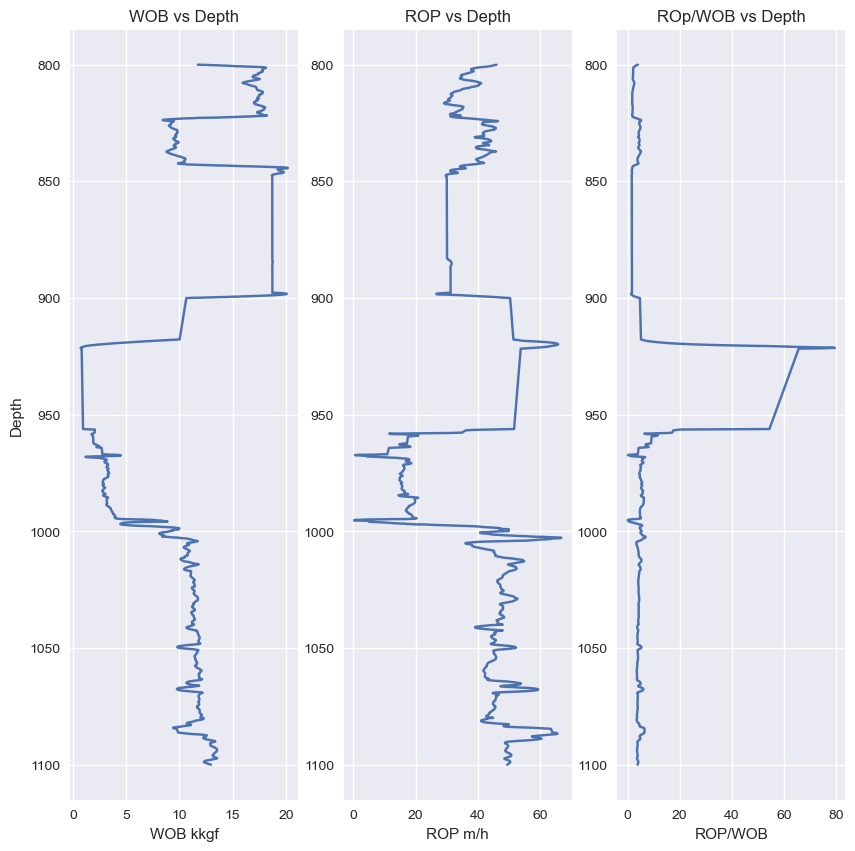

In [9]:
plt.style.use('seaborn')
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize = (10,10))

ax2.set_ylabel('Depth');
ax2.plot(data.WOB,data.MD)
ax2.set_xlabel('WOB kkgf');
ax2.set_title('WOB vs Depth');
ax2.invert_yaxis()

ax3.plot(data.ROP,data.MD)
ax3.set_xlabel('ROP m/h');
ax3.set_title('ROP vs Depth');
ax3.invert_yaxis()

ax4.plot(data['ROP/WOB'],data.MD)
ax4.set_xlabel('ROP/WOB');
ax4.set_title('ROp/WOB vs Depth');
ax4.invert_yaxis()
#fig.savefig('analysis', dpi =300)

In [23]:
#MSE anomaly detection (with cutting low filter)
data_pr_9A = MSE_anomaly_detection(data_9A)
data_pr_9 = MSE_anomaly_detection(data_9)
data_pr_5 = MSE_anomaly_detection(data_5)
data_pr_7 = MSE_anomaly_detection(data_7)
data_pr_14 = MSE_anomaly_detection(data_14)
data_pr_15 = MSE_anomaly_detection(data_15)
data_pr_15S = MSE_anomaly_detection(data_15S)

In [29]:
data_9A

,MD,TVD,WOB,Torque,ROP,RPM,Diameter,Standpipe Pressure,Hookload,Gamma,MSE,complication,anomaly
0,491.033,490.760309,6.783699,0.425185,46.153444,84.000,311.15,9440.922214,93.780222,150.88,-7.052692,0,1
1,491.185,490.910880,6.688755,0.299040,45.071869,84.000,311.15,9499.941336,93.979803,150.88,-5.797103,0,1
2,491.222,490.910880,6.589792,0.193413,44.097526,84.000,311.15,9499.941336,93.979803,150.88,-4.532069,0,1
3,491.338,491.061756,6.487085,0.107537,43.226799,84.000,311.15,9313.024466,94.079593,146.26,-3.258502,0,1
4,491.341,491.061756,6.380911,0.040646,42.456071,84.000,311.15,9313.024466,94.079593,146.26,-1.977316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13741,1205.755,1013.078086,12.447733,9.581289,39.844888,194.680,215.90,10986.726799,88.119390,25.37,487.429851,0,1
13742,1205.789,1013.095459,12.429315,9.555219,39.658513,194.571,215.90,10953.887070,88.213283,25.37,487.837224,0,1
13743,1205.810,1013.106432,12.410411,9.526992,39.453316,194.571,215.90,10953.887070,88.213283,25.37,488.209292,0,1
13744,1205.880,1013.142703,12.391013,9.496555,39.228461,194.571,215.90,10953.887070,88.213283,25.37,488.544163,0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


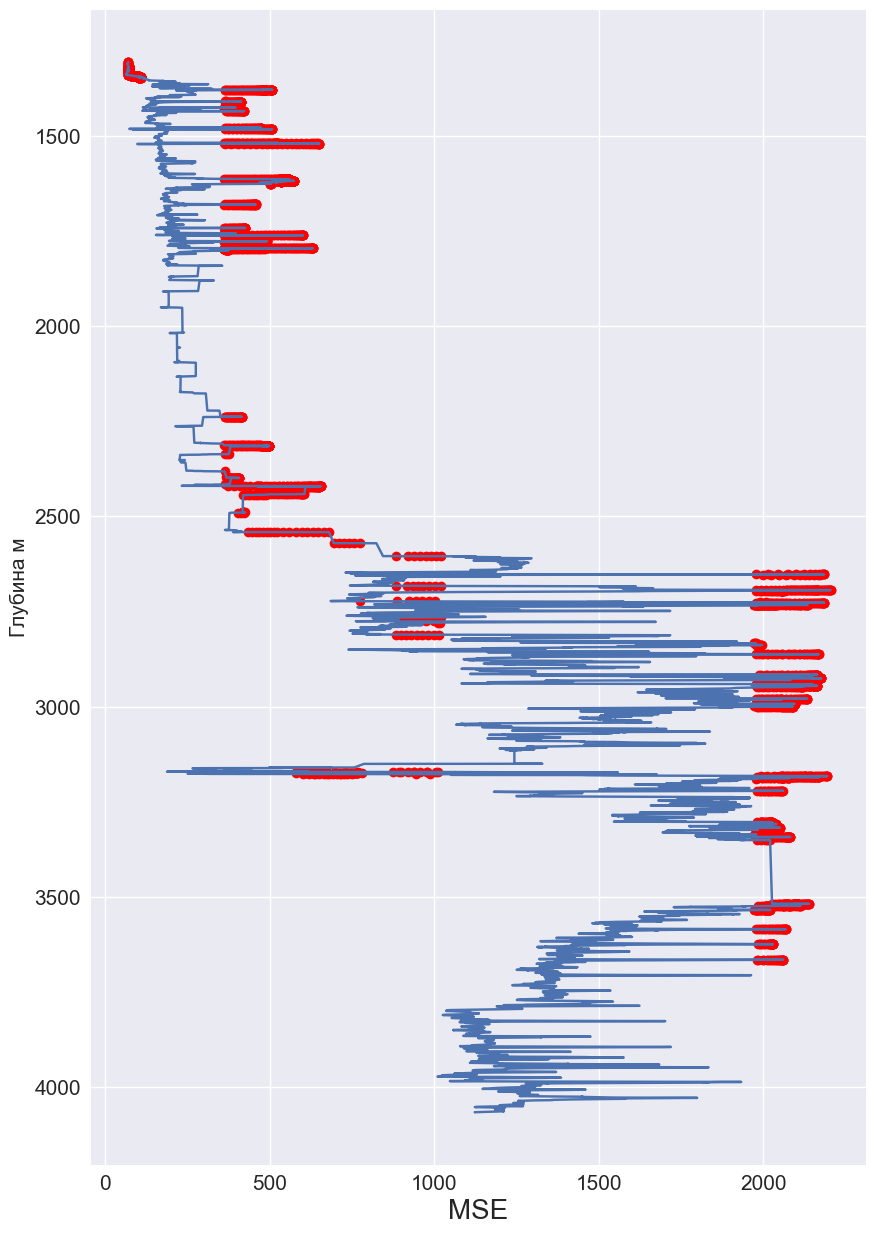

In [24]:
plot_anomaly(data_pr_15)

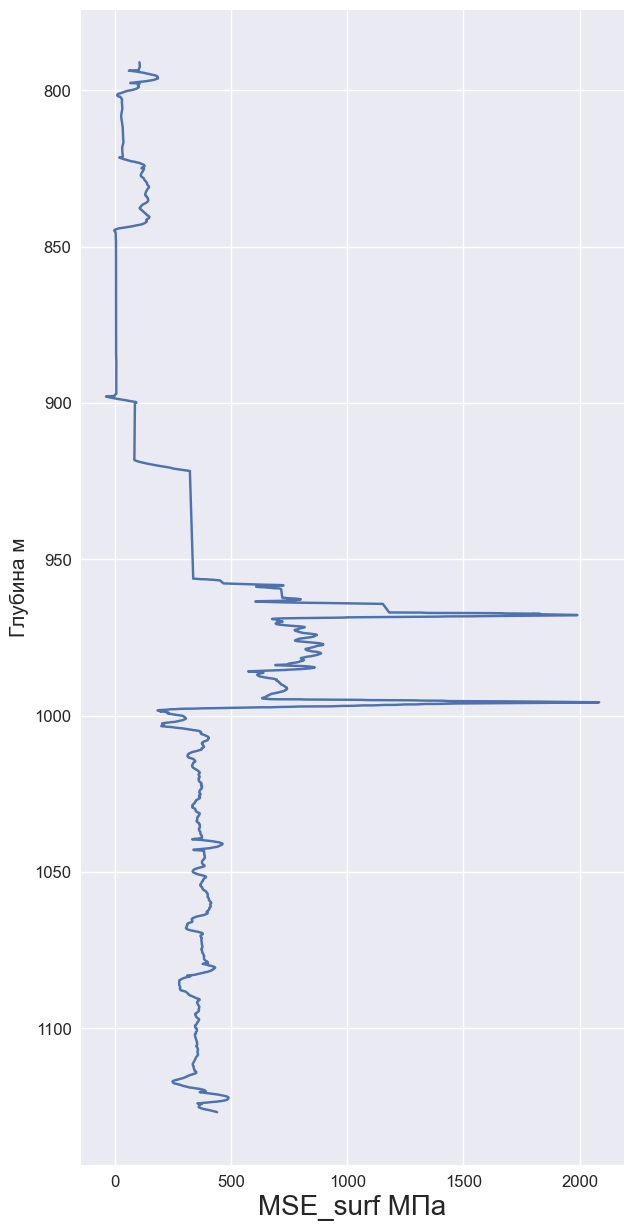

In [26]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(7,15))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)
ax.set_xlabel('MSE_surf МПа', fontsize=20)
ax.set_ylabel('Глубина м', fontsize=15)
plt.tick_params(axis='both',labelsize=12)
ax.plot(data_9A.MSE[6500:12000],data_9A.MD[6500:12000])
ax.invert_yaxis()
fig.savefig('F_9A MWD', dpi=400)

In [30]:
#REPORT
print('Classification report on well F_9A')
print(classification_report(data_pr_9A['complication'],data_pr_9A['anomaly']))
print('Classification report on well F_9')
print(classification_report(data_pr_9['complication'],data_pr_9['anomaly']))
print('Classification report on well F_5')
print(classification_report(data_pr_5['complication'],data_pr_5['anomaly']))
print('Classification report on well F_7')
print(classification_report(data_pr_7['complication'],data_pr_7['anomaly']))
print('Classification report on well F_14')
print(classification_report(data_pr_14['complication'],data_pr_14['anomaly']))
print('Classification report on well F_15')
print(classification_report(data_pr_15['complication'],data_pr_15['anomaly']))
print('Classification report on well F_15S')
print(classification_report(data_pr_15S['complication'],data_pr_15S['anomaly']))

Classification report on well F_9A
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     12164
           1       0.07      0.60      0.13      1582

    accuracy                           0.07     13746
   macro avg       0.02      0.20      0.04     13746
weighted avg       0.01      0.07      0.01     13746

Classification report on well F_9
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00    7851.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00    7851.0
   macro avg       0.00      0.00      0.00    7851.0
weighted avg       0.00      0.00      0.00    7851.0

Classification report on well F_5
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00   